# ATDA 5340 - Final - Part 4 - ML Supervised - Denis Shilkin
The dataset abalone.csv
<br> Linear regression

### 1. Import libraries

In [1]:
# import libraries 
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# supress warnings
import warnings
warnings.filterwarnings("ignore")




### 2. Load dataset
<br>1. Sex
<br>2. Length: mm: Longest shell measurement
<br>3. Diameter: mm : perpendicular to the length
<br>4. Height : mm : with meat in the shell
<br>5. Whole weight : grams : whole abalone
<br>6. Shucked weight : grams : weight of meat
<br>7. Viscera weight : grams : gut weight (after bleeding)
<br>8. Shell weight : grams : after being dried
<br>9. Rings : integer : +1.5 gives the age in years

In [2]:
filename = "abalone.csv"

df = pd.read_csv(filename, index_col=False, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell_Weight', 'Rings'])

print(df.shape)

(4177, 9)


In [3]:
print(df.head(5))

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_Weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [4]:
print(df.isnull().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell_Weight      0
Rings             0
dtype: int64


In [5]:
print(df.groupby('Sex').size())

Sex
F    1307
I    1342
M    1528
dtype: int64


In [6]:
df[['Sex']]=df[['Sex']].replace("M",0)
df[['Sex']]=df[['Sex']].replace("F",1)
df[['Sex']]=df[['Sex']].replace("I",2)

### 3. EDA

In [7]:
print(df.describe())

               Sex       Length     Diameter       Height  Whole Weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      0.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%       0.000000     0.450000     0.350000     0.115000      0.441500   
50%       1.000000     0.545000     0.425000     0.140000      0.799500   
75%       2.000000     0.615000     0.480000     0.165000      1.153000   
max       2.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked Weight  Viscera Weight  Shell_Weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     

### 4. Graphs

#### 4.1. Histogram

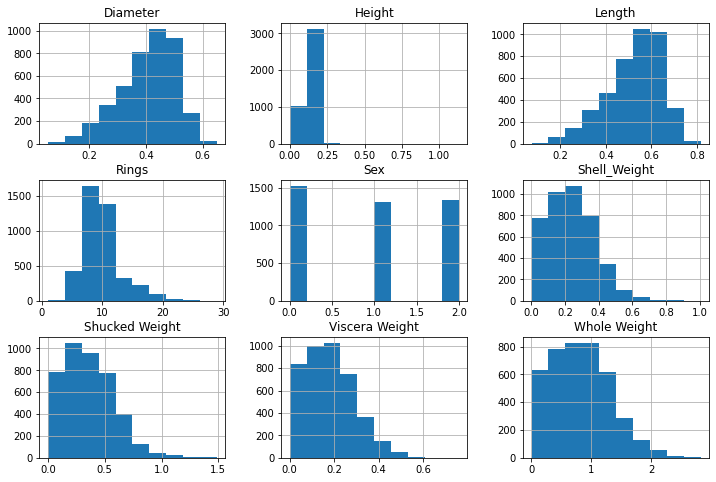

In [8]:
df.hist(figsize=(12, 8))
pyplot.show()

#### 4.2. Density plots

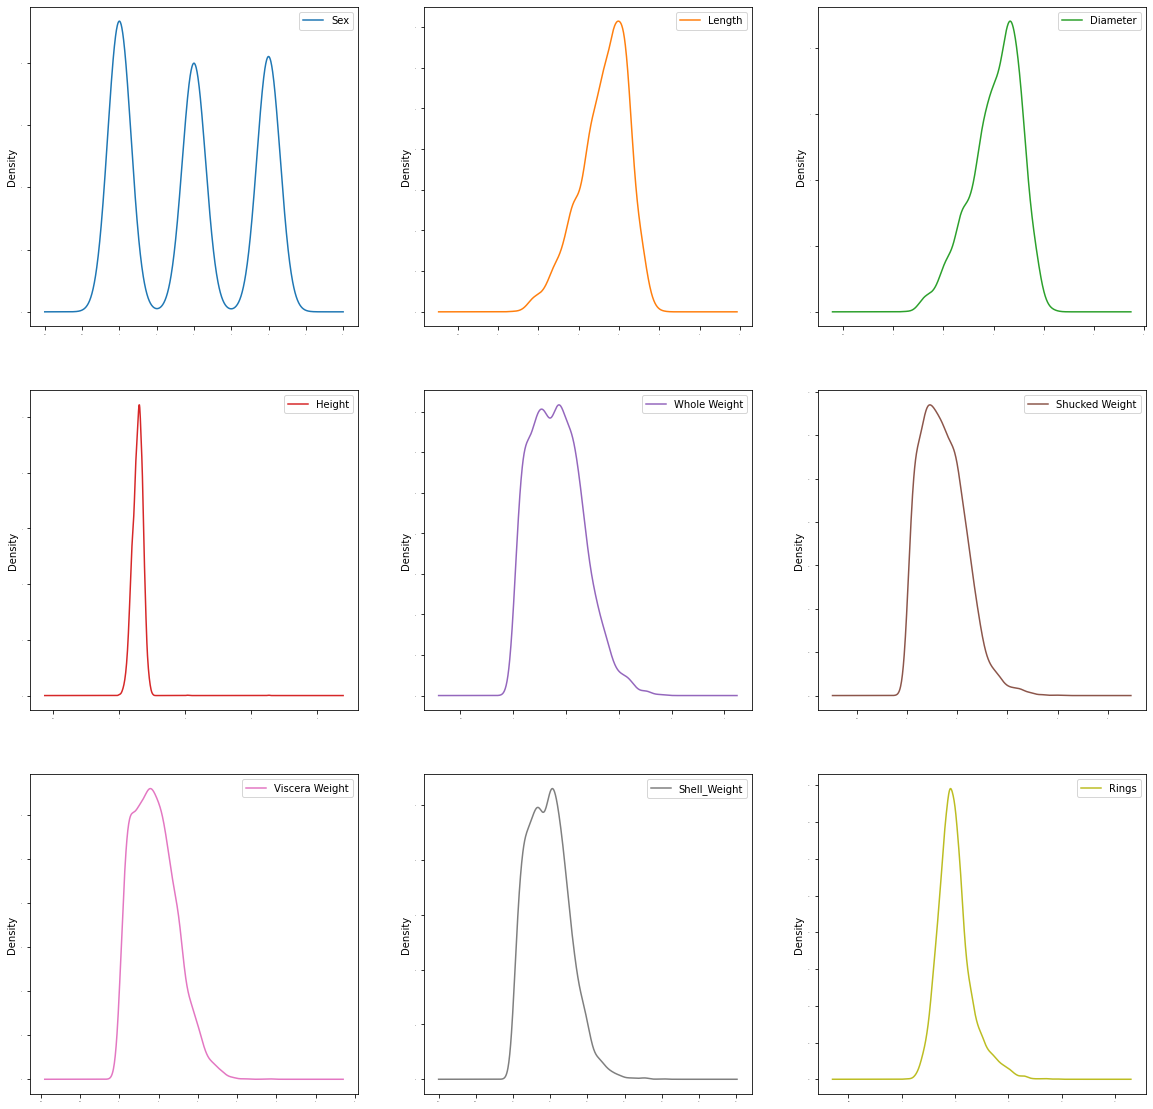

In [9]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(20,20))
pyplot.show()

#### 4.3. S-Boxes

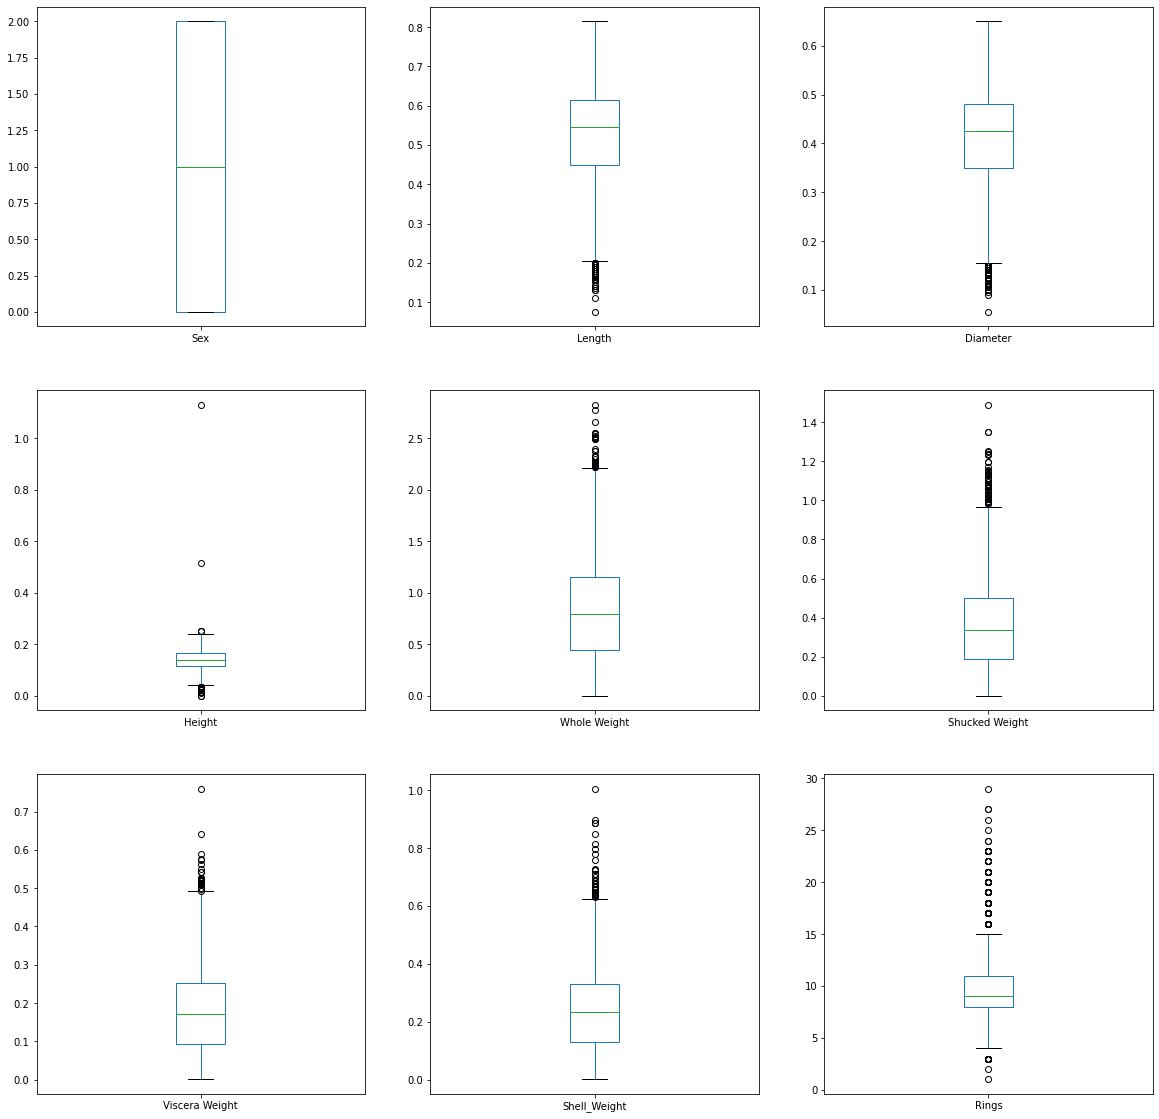

In [10]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

#### 4.4. Scatter plots

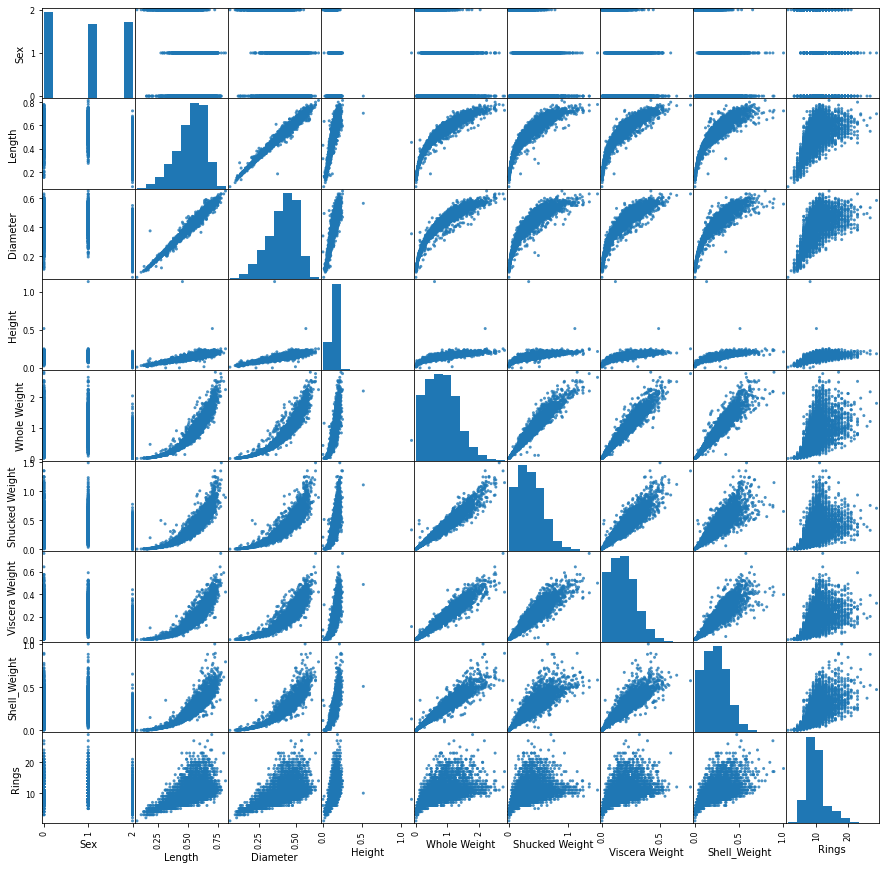

In [11]:
scatter_matrix(df, alpha=0.8, figsize=(15,15))
pyplot.show()

### 5. Model creation and training

In [12]:
array = df.values

X = array [:,0:8]
Y = array [:,8]

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Generate model
model = LinearRegression()

model.fit(X_train, Y_train)

print(model.intercept_)

3.474003242627389


In [13]:
print(model.coef_)

[ -0.35630459   1.20355943  10.96530037   9.01990899   9.64756191
 -19.90888689 -10.97236818   6.31531545]


In [14]:
names_2= ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell_Weight"]

coef_zip = zip(names_2, model.coef_)

coeffs = set(coef_zip)

for coef in coeffs: print(coef, "\n")

('Diameter', 10.965300366086474) 

('Height', 9.01990898559119) 

('Sex', -0.3563045893906889) 

('Shucked Weight', -19.908886891645082) 

('Whole Weight', 9.647561907996941) 

('Viscera Weight', -10.972368178421394) 

('Shell_Weight', 6.315315446228861) 

('Length', 1.203559432904754) 



### 6. R-Squarred error

In [15]:
r_squarred = model.score(X, Y)
print ("R Squarred = ", r_squarred)

R Squarred =  0.533089828830458


### 7. Prediction

#### 7.1. Prediction 1

In [16]:
print("Age in years:",model.predict([[0, 0.245, 0.300, 0.100, 0.4578, 0.3333, 0.500, 0.1223]])+1.5)

Age in years: [2.52765714]


#### 7.2. Prediction 2

In [17]:
print("Age in years:",model.predict([[1, 0.442, 0.100, 0.400, 0.6778, 0.2333, 0.670, 0.3456]])+1.5)

Age in years: [6.57962604]


### 8. K-Fold validation

In [18]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')

print(results.mean())

-5.217558286600993
